<a href="https://colab.research.google.com/github/mayuri320/Titanic-data-analysis/blob/main/Titanic_data_analysisETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What was the overall survival rate?

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


How many passengers were in each class (Pclass)?

In [ ]:
class_count = df['Pclass'].value_counts()
print(class_count)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Did gender play a role in survival? (Survival rate by Sex)

In [ ]:
gender_survival = df.groupby('Sex')['Survived'].mean()
print(gender_survival)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


What was the survival rate based on Passenger Class?

In [ ]:
class_survival = df.groupby('Pclass')['Survived'].mean()
print(class_survival)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


What was the average age of survivors vs. non-survivors?

In [ ]:
avg_age = df.groupby('Survived')['Age'].mean()
print(avg_age)

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


Which embarkation port had the highest survival rate?

In [ ]:
Embarked_survived = df.groupby('Embarked')['Survived'].mean()
print(Embarked_survived)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


How many missing values are in each column?

In [ ]:
missing_data = df.isnull().sum()
print(missing_data)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


What was the survival rate of "Women and Children" vs. Men?

In [ ]:
df['adult_male'] = (df['Sex'] == 'male') & (df['Age']>=18)
compare = df.groupby('adult_male')['Survived'].mean()
print(compare)

adult_male
False    0.548387
True     0.177215
Name: Survived, dtype: float64


Is there a correlation between Fare price and Survival?

In [ ]:
correlation = df['Fare'].corr(df['Survived'])
print(f"correlation between Fare price and Survival : {correlation:.2f}%")

correlation between Fare price and Survival : 0.26%


How many passengers traveled alone vs. with family?

In [ ]:
df['family_size'] = df['SibSp'] + df['Parch']
df['alone']= df['family_size'] == 0
alone_counts = df['alone'].value_counts()
print(alone_counts)

alone
True     537
False    354
Name: count, dtype: int64


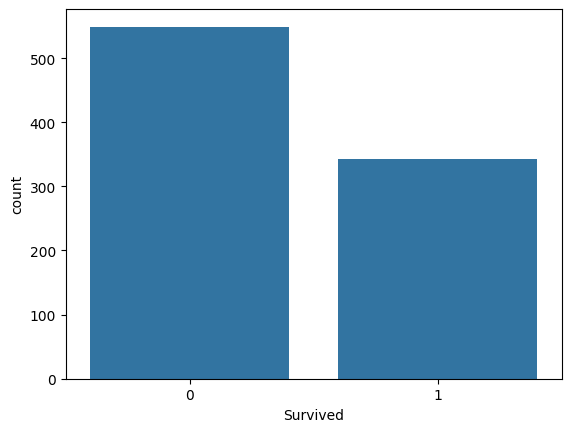

In [ ]:
sns.countplot(x='Survived', data=df)
plt.show()

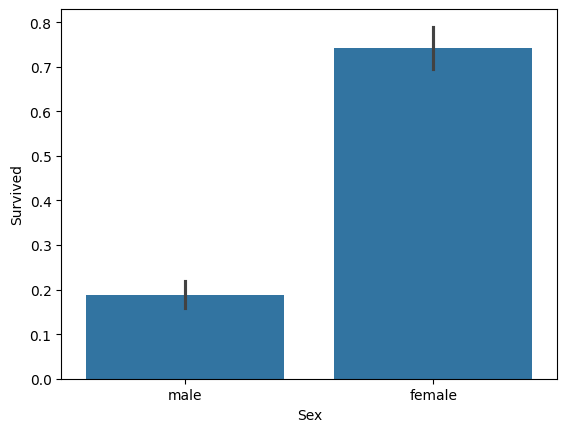

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

Data Cleaning

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.drop('Cabin', axis=1, inplace=True)

/tmp/ipython-input-3630921683.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


We’ll predict: Who survived Titanic

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
x= df[['Age', 'Fare']]
y = df['Survived']

x = x.fillna(x.mean())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65
